In [13]:
import torch
from torch import nn
#import torchvisions
import cv2
import pickle
import matplotlib.pyplot as plt

In [3]:
%store -r

In [4]:
%who

a	 cv2	 distinct_blob_quantities	 distinct_blob_quantities_new	 distinct_blob_quantities_pickled_td	 indices	 indices_eval	 indices_eval_zoom	 indices_td	 
indices_td_zoom	 metric_stats	 metric_stats_MS_SSIM	 metric_stats_MS_SSIM_CARE	 metric_stats_MS_SSIM_CARE_beam	 metric_stats_MS_SSIM_CARE_beam_zoom	 metric_stats_MS_SSIM_N2V	 metric_stats_MS_SSIM_N2V_zoom	 metric_stats_MS_SSIM_beam	 
metric_stats_MS_SSIM_beam_zoom	 metric_stats_NRMSE	 metric_stats_NRMSE_CARE	 metric_stats_NRMSE_CARE_beam	 metric_stats_NRMSE_CARE_beam_zoom	 metric_stats_NRMSE_N2V	 metric_stats_NRMSE_N2V_zoom	 metric_stats_NRMSE_beam	 metric_stats_NRMSE_beam_zoom	 
metric_stats_PSNR	 metric_stats_PSNR_CARE	 metric_stats_PSNR_CARE_beam	 metric_stats_PSNR_CARE_beam_zoom	 metric_stats_PSNR_N2V	 metric_stats_PSNR_N2V_zoom	 metric_stats_PSNR_beam	 metric_stats_PSNR_beam_zoom	 metric_stats_RMSE	 
metric_stats_RMSE_CARE	 metric_stats_RMSE_CARE_beam	 metric_stats_RMSE_CARE_beam_zoom	 metric_stats_RMSE_N2V	 metric_stats_RMSE_N

In [7]:
# noised_images_eval_beam_zoom_pickled
with open("/Users/miriamczech/Desktop/denoising_assessment/pickled_data/EVAL/noised_images_eval_beam_zoom.pkl", 'rb') as noised_images_eval_beam_zoom_pickled:
    noised_images = pickle.load(noised_images_eval_beam_zoom_pickled)

In [8]:
denoised_with_guassian = torch.zeros(noised_images.shape)

In [9]:
print(denoised_with_guassian.shape)

torch.Size([20, 20, 50, 256, 256])


In [17]:
for n in range(0,20):
    for m in range(0,20):
        for i in range(0,50):
            image = noised_images[n,m,i,:,:]
            denoised_image = cv2.GaussianBlur(image.numpy(), (5, 5), 2)
            denoised_with_guassian[n,m,i,:,:] = torch.from_numpy(denoised_image)
    

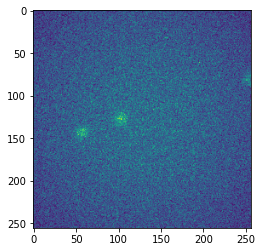

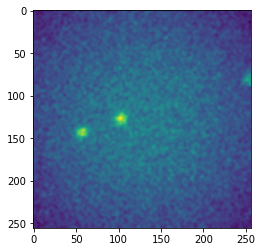

In [18]:
fig = plt.figure()
plt.imshow(noised_images[0,0,0,:,:])

fig = plt.figure()
plt.imshow(denoised_with_guassian[0,0,0,:,:])
plt.show()

In [22]:
denoised_with_guassian_pickled = pickle.dump(denoised_with_guassian, open("/Users/miriamczech/Desktop/denoising_assessment/pickled_data/EVAL/denoised_with_guassian.pkl", 'wb'), protocol=4)
%store denoised_with_guassian_pickled

Stored 'denoised_with_guassian_pickled' (NoneType)
